In [1]:
from IPython.display import display, DisplayHandle
from ipywidgets import interact, interactive, fixed, interact_manual

from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor

import numpy as np
from numpy import matrix as M
from math import sin, cos, pi

In [2]:
# constants
WIDTH, HEIGHT = 300, 300

In [3]:
i = Image.new("RGB", (WIDTH, HEIGHT))
draw = ImageDraw.Draw(i)

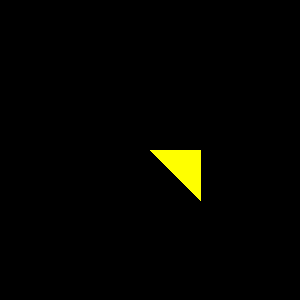

In [4]:
draw.polygon([(150,150), (200,200), (200,150)], fill=(255,255,0))
display(i)

## 3D Experiment 1: Moving the Triangle

In [5]:
# copied from Rotating Clock notebook
def translate(tx, ty, tz, p=None):
    T = M([[1, 0, 0, tx],
           [0, 1, 0, ty],
           [0, 0, 1, tz],
           [0, 0, 0,  1]])
    if p is None:
        return T
    else:
        p = list(p)
        p.append(1)
        p = T @ p
        x = p.tolist()[0][0]
        y = p.tolist()[0][1]
        z = p.tolist()[0][2]
        return((x,y,z))

In [6]:
def project_ortho(p=None):
    T = M([[1, 0, 0,  0],
           [0, 1, 0,  0],
           [0, 0, 0,  0],
           [0, 0, 0,  1]])
    if p is None:
        return T
    else:
        p = list(p)
        p.append(1)
        p = T @ p
        x = p.tolist()[0][0]
        y = p.tolist()[0][1]
        #z = p.tolist()[0][2]
        return((x,y))

In [7]:
def project_perspective(d=1, p=None):
    T = M([[1, 0, 0,  0],
           [0, 1, 0,  0],
           [0, 0, 1,  0],
           [0, 0, -1/d,  0]])
    if p is None:
        return T
    else:
        p = list(p)
        p.append(1)
        p = T @ p
        #print(p)
        w = p.tolist()[0][3]
        x = p.tolist()[0][0] / (w+0.0001) # FIXME!!! (just here to avoid division by 0)
        y = p.tolist()[0][1] / (w+0.0001) # FIXMEEEEE !!!!!
        #z = p.tolist()[0][2]
        return((x,y))

In [8]:
def render(xpos: int, ypos: int, zpos: int):
        draw.rectangle([(0,0), (300,300)], fill=0)
        points = [(-50,-50, 0), (50,50, 0), (50,-50, 0)] # in 3D, our origin is in the center of the screen
        new_points = []
        for point in points:
            # transform in 3D             
            p = translate(xpos, ypos, zpos, point)
            # project to 2D
            p = project_perspective(-1, p)
            p = (p[0] + WIDTH//2, p[1] + HEIGHT//2) # move the origin to the center of the canvas
            new_points.append(p)            
        draw.polygon(new_points, fill=(255,255,0))
        d.update(i)

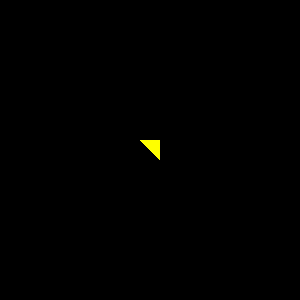

In [9]:
d = DisplayHandle()
d.display(i)

In [10]:
_ = interact(render, xpos=(-100,100), ypos=(-100,100), zpos=(0,10.0))

interactive(children=(IntSlider(value=0, description='xpos', min=-100), IntSlider(value=0, description='ypos',…

## Next steps
- add rotate and scale functions
- add a cube: define the six sides of the cube as polygons in 3D space
- implement backface culling by calculating the normal of each polygon and determining whether it faces towards the viewport or away from it. 
- add another object, e.g. a plane or another cube
- implement the painters algorithm: determine the center of each polygon and then sort the polygon's by Z value before drawing them
- add a camera and apply it's perspective by multiplying the inverse of the camera transform matrix onto each vertex